In [50]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns



In [90]:
wa_rentals = pd.read_csv(r"C:\Users\mattl\OneDrive\Documents\reibrowser\Database\Redfin Data\geocoded_washington_rentals.csv")

wa_houses = wa_rentals[(wa_rentals["Property Type"] == 6) & (wa_rentals["Max Beds"] < 5)]

## First Use KNN to get an average rent price for the 10 nearest houses with the same number of bedrooms

In [91]:

knn_features = ["Latitude", "Longitude"]

target = "Max Rent Price"

wa_houses['KNN_Rent_Value'] = np.nan

for beds in range(1, 5, 1):
    print(beds)
    knn_df = wa_houses.dropna(subset=knn_features + [target])
    knn_df = knn_df[knn_df["Max Beds"] == beds]
    print("Houses Analyzed", len(knn_df))
    
    if len(knn_df) > 1:
        X = knn_df[knn_features]
        y = knn_df[target]

        # Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize KNN Regressor
        knn_regressor = KNeighborsRegressor(n_neighbors=10, metric='euclidean')

        # Fit the model
        knn_regressor.fit(X_train, y_train)

        # Predict on the training set to get KNN rent values
        y_knn = knn_regressor.predict(X)

        # Append the KNN rent values to the DataFrame
        wa_houses.loc[knn_df.index, 'KNN_Rent_Value'] = y_knn

        # Predict on the test set for evaluation
        y_pred = knn_regressor.predict(X_test)

        # Evaluate the model
        mse = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"Mean Absolute Error: {mse}")
        print(f"Rsquared: {r2}")

display(wa_houses)

1
Houses Analyzed 208
Mean Absolute Error: 316.1380952380953
Rsquared: -0.06792727860954906
2
Houses Analyzed 312
Mean Absolute Error: 478.5936507936508
Rsquared: 0.46006056423444386
3
Houses Analyzed 649
Mean Absolute Error: 464.906923076923
Rsquared: 0.3857276327200121
4
Houses Analyzed 364
Mean Absolute Error: 966.8342465753424
Rsquared: 0.36418679549927424


C:\Users\mattl\AppData\Local\Temp\ipykernel_38700\1221888668.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_houses['KNN_Rent_Value'] = np.nan


,Property ID,URL,Property Type,Address,City,State,ZIP Code,Country Code,Latitude,Longitude,...,Max Baths,Max Square Feet,Max Rent Price,Description,cbg_geoid,cbsa_geoid,cbsa_name,state_id,State_Code,KNN_Rent_Value
1,209269,/WA/Auburn/4903-S-283rd-Pl-98001/home/209269,6,4903 S 283rd Pl,Auburn,WA,98001.0,1,47.347206,-122.271890,...,3.0,2650.0,4295.0,Welcome to this beautiful home in the highly d...,5.303303e+11,42660.0,"Seattle-Tacoma-Bellevue, WA",48.0,WA,3814.0
2,40265097,/WA/Auburn/27810-47th-Pl-S-98001/home/40265097,6,27810 47th Pl S,Auburn,WA,98001.0,1,47.352111,-122.274841,...,2.5,1930.0,3147.0,Offered By: Spinnaker Property Management Desc...,5.303303e+11,42660.0,"Seattle-Tacoma-Bellevue, WA",48.0,WA,3018.7
3,113179480,/WA/Auburn/3071-S-276th-Ct-98001/home/113179480,6,3071 S 276th Ct,Auburn,WA,98001.0,1,47.353470,-122.293626,...,2.5,2623.0,4200.0,Avail Now. And just in time to enjoy summer wi...,5.303303e+11,42660.0,"Seattle-Tacoma-Bellevue, WA",48.0,WA,3745.5
4,173657113,/WA/Auburn/5638-S-302nd-St-98001/home/173657113,6,5638 S 302nd St,Auburn,WA,98001.0,1,47.331213,-122.264241,...,2.5,2472.0,3750.0,Welcome Home! This Space is sprawling with lig...,5.303303e+11,42660.0,"Seattle-Tacoma-Bellevue, WA",48.0,WA,3814.0
5,212496,/WA/Auburn/29106-45th-Ave-S-98001/home/212496,6,29106 45th Ave S,Auburn,WA,98001.0,1,47.340573,-122.277476,...,2.0,1880.0,2975.0,Property Id: 874757 Clean and spacious split l...,5.303303e+11,42660.0,"Seattle-Tacoma-Bellevue, WA",48.0,WA,3814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,126455761,/WA/Walla-Walla/415-N-Roosevelt-St-99362/home/...,6,415 N Roosevelt St,Walla Walla,WA,99362.0,1,46.076743,-118.312791,...,2.0,1502.0,2395.0,Inviting 3 Bedroom House with Lots of Parking<...,5.307192e+11,47460.0,"Walla Walla, WA",48.0,WA,2306.5
4849,175985279,/WA/Walla-Walla/235-W-Sumach-St-99362/home/175...,6,235 W Sumach St,Walla Walla,WA,99362.0,1,46.066870,-118.343635,...,3.5,1940.0,2595.0,Centrally located townhome built in 2008. This...,5.307192e+11,47460.0,"Walla Walla, WA",48.0,WA,2306.5
4857,126380542,/WA/Walla-Walla/105-N-Bellevue-Ave-99362/home/...,6,105 N Bellevue Ave,Walla Walla,WA,99362.0,1,46.071801,-118.318243,...,2.0,2244.0,2245.0,"Four bedroom, two bathroom, single family home...",5.307192e+11,47460.0,"Walla Walla, WA",48.0,WA,2406.0
4863,126381245,/WA/Walla-Walla/536-Pleasant-St-99362/home/126...,6,536 Pleasant St,Walla Walla,WA,99362.0,1,46.061948,-118.323622,...,2.0,1725.0,2495.0,Charming 4 bedroom Home<BR><BR>Welcome to this...,5.307192e+11,47460.0,"Walla Walla, WA",48.0,WA,2406.0


# Regression using Nearest Neighbor Rental value is effective

Max Beds           0.545425
Max Baths          0.568249
Max Square Feet    0.742900
KNN_Rent_Value     0.793267
dtype: float64


<Axes: >

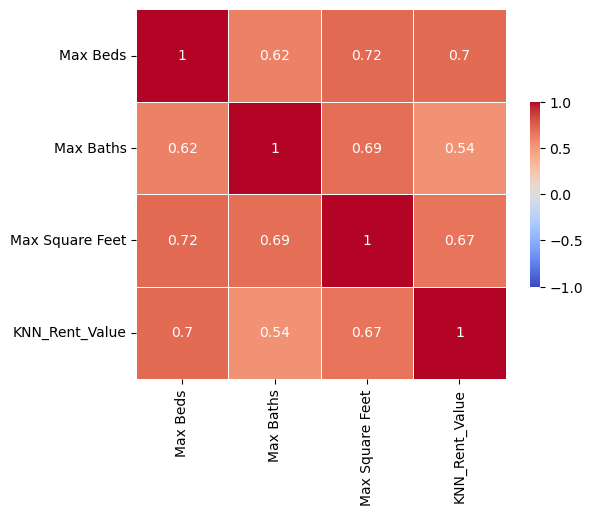

In [92]:
#Check Feature Correlation
regression_features = ["Max Beds", "Max Baths", "Max Square Feet", "KNN_Rent_Value"]
target = "Max Rent Price"

corr = wa_houses[regression_features].corrwith(wa_houses[target])

print(corr)

correlation_matrix = wa_houses[regression_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [93]:
linear_reg_df = wa_houses.dropna(subset=regression_features + [target])

print(len(wa_houses) - len(linear_reg_df)," Out of ", len(wa_houses), " Houses removed for data quality")

X = linear_reg_df[regression_features]
y = linear_reg_df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.22, random_state= 69)

y_pred = LinearRegression().fit(X_train, y_train).predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(mae)
print(r2)

200  Out of  1561  Houses removed for data quality
443.0753295436438
0.7115486983266752
